In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

### Loading Dataset

In [2]:
X = np.load("data/train_x.npy")

In [3]:
Y = np.load("data/test_y.npy")[:-1]

In [4]:
print(X.shape)

(5129, 10, 4)


In [5]:
print(X[3])

[[-1.2558755  -1.23844714 -1.25525093 -1.24713926]
 [-1.24495855 -1.20768565 -1.24781193 -1.21029488]
 [-1.20420194 -1.20625488 -1.22493702 -1.22132995]
 [-1.22139613 -1.22011544 -1.26482863 -1.25780953]
 [-1.2558755  -1.23075677 -1.2679902  -1.23373301]
 [-1.22494414 -1.21036834 -1.22716872 -1.21521962]
 [-1.21857592 -1.20097893 -1.21712608 -1.20710291]
 [-1.20265537 -1.19874335 -1.22168246 -1.22087396]
 [-1.21948567 -1.20580777 -1.22447209 -1.21093327]
 [-1.19428571 -1.19516644 -1.20466576 -1.20108378]]


In [6]:
print(Y.shape)

(5129, 1)


In [7]:
print(Y[2])

[-1.19428571]


In [8]:
np.unique(X)

array([-1.42606884, -1.42021063, -1.41407346, ...,  4.0907356 ,
        4.12210082,  4.21897442])

### Test Train Split

In [9]:
## Hold Out Validation method   90% - train  , 10% - test
train_size = int(len(X)*0.9)

In [10]:
## training data
X_train  = X[ : train_size]
Y_train  = Y[ : train_size]

In [11]:
## testing data
X_test = X[  train_size : ]
Y_test  = Y[ train_size : ]

In [12]:
print(X_train[0])

[[-1.34957931 -1.32608163 -1.35102798 -1.32493196]
 [-1.31155194 -1.29004418 -1.32536345 -1.28817879]
 [-1.31473605 -1.26133942 -1.3154138  -1.26875341]
 [-1.2558755  -1.23844714 -1.25525093 -1.24713926]
 [-1.24495855 -1.20768565 -1.24781193 -1.21029488]
 [-1.20420194 -1.20625488 -1.22493702 -1.22132995]
 [-1.22139613 -1.22011544 -1.26482863 -1.25780953]
 [-1.2558755  -1.23075677 -1.2679902  -1.23373301]
 [-1.22494414 -1.21036834 -1.22716872 -1.21521962]
 [-1.21857592 -1.20097893 -1.21712608 -1.20710291]]


In [13]:
print(Y_train[0])

[-1.20265537]


In [14]:
print("Xtrain : " ,X_train.shape)
print("Ytrain : ", Y_train.shape)
print("Xtest : " ,X_test.shape)
print("Ytest : " ,Y_test.shape)

Xtrain :  (4616, 10, 4)
Ytrain :  (4616, 1)
Xtest :  (513, 10, 4)
Ytest :  (513, 1)


## Linear Regression Model

In [15]:
class MultiVariateLinearRegression:
    
    def __init__(self, X, y):
        self.X = ((X - X.mean(axis=0))/X.std(axis=0))
        self.y = y
        
        self.coefs1 = np.random.uniform(low=-1, high=1, size=(X.shape[2],))
        self.bias1 = np.random.random()
        
        self.coefs2 = np.random.uniform(low=-1, high=1, size=(X.shape[1],))
        self.bias2 = np.random.random()
        
    def compute_loss(self):
        y_pred  , inputlayer = np.array(self.get_all_preds())
        dif = (y_pred - self.y)**2
        dif = np.array(dif)
        return dif.sum() / (2 * self.X.shape[0])
    
    def calculate_gradients(self):
        grad_02 = 0
        coefs1 = list()
        grad_01 = 0
        coefs2 = list()
        
        ypred , layer2_input =self.get_all_preds()
        layer2_input = np.array(layer2_input)
        yhat = np.array(ypred)
        diff = yhat - self.y
        diff = np.array(diff)
        grad_02 += diff.sum()/self.X.shape[0]
        
        for j in range(self.X.shape[1]):
            grad2 = (diff * layer2_input[: , j]).sum() / self.X.shape[0]
            coefs2.append(grad2)
        coefs2= np.array(coefs2) 
 
        grad_01 += (diff * self.coefs2.sum(axis=0) ).sum() /( 10*self.X.shape[0])
    
        for j in range(self.X.shape[2]):
            grad1 =( diff *( self.coefs2[j].sum() * self.X[ : ,:,j] ).sum(axis=1) ).sum()  /( self.X.shape[0])
            coefs1.append(grad1)  
        coefs1 = np.array(coefs1)

        return (grad_02, coefs2 , grad_01 ,coefs1)
        
        
    def update_weights(self, gradients, learning_rate):
        grad_02, coefs2 , grad_01 ,coefs1 = gradients
       
        self.bias2 = self.bias2 - (learning_rate * grad_02)
        self.coefs2 = self.coefs2 - (coefs2 * learning_rate)
        
        self.bias1 = self.bias1 - (learning_rate * grad_01)
        self.coefs1 = self.coefs1 - (coefs1 * learning_rate)
    
    def predict_layer1(self, x):
        return self.coefs1.dot(x) + self.bias2
    
    def predict_layer2(self, x):
        return self.coefs2.dot(x) + self.bias2
    
    
    def get_all_preds(self ):
        
        layer2_input = []
        for x in self.X:
            temp=[]
            for inx in x:
                temp.append(self.predict_layer1(inx))
            layer2_input.append(temp)
            
        preds = []
        for x in layer2_input:
            preds.append(self.predict_layer2(x))
        return preds ,layer2_input
     
    def get_all_prediction(self , X ):
        layer2_input = []
        for x in  X:
            temp=[]
            for inx in x:
                temp.append(self.predict_layer1(inx))
            layer2_input.append(temp)
            
        preds = []
        for x in layer2_input:
            preds.append(self.predict_layer2(x))
        return preds
    
    def predict(self , x ):
        
        layer2_input = []
        for inx in x:
            layer2_input.append(self.predict_layer1(inx)) 
        return self.predict_layer2(layer2_input)
    
    
    def train(self, losses, iterations=1, alpha=0.01):
        for _ in range(iterations):
            gradients = self.calculate_gradients()
            self.update_weights(gradients, alpha)
            losses.append(self.compute_loss())
        return losses
    
    def load_weights(self):
        model.bias1 = np.load("output/reg10/b1.npy")
        model.bias2 = np.load("output/reg10/b2.npy")
        model.coefs1 = np.load("output/reg10/w1.npy")
        model.coefs2 = np.load("output/reg10/w2.npy")
        
    def save_weights(self):
        np.save("output/reg20/b1",model.bias1)
        np.save("output/reg20/b2",model.bias2)
        np.save("output/reg20/w1",model.coefs1)
        np.save("output/reg20/w2",model.coefs2)
        np.save("output/reg20/reg20",avgloss)

In [16]:
model = MultiVariateLinearRegression(X_train ,np.resize(Y_train , (Y_train.shape[0],)))                     

In [18]:
trained = True
if trained :
    model.load_weights()
else :
    loss =[]
    loss = model.train(loss ,20)
    plt.plot(loss)

In [20]:
def error(y_test , y_pred):
    return np.sum( (y_test - y_pred )**2 )/float(len(y_test))

In [55]:
def plot_results(predicted_data, true_data , title="" ):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.title(title)
    plt.legend()
    plt.show()

In [22]:
def predict_and_draw(model , x_test , y_test):
    y_pred =[]
    
    y_pred = np.array(model.get_all_prediction(x_test))
    plot_results(y_pred, y_test)
    return y_pred

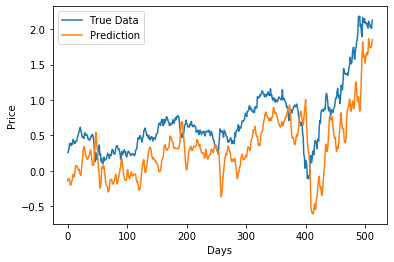

In [23]:
y_pred = predict_and_draw(model , X_test , Y_test)

In [50]:
std   = np.load("data/std.npy")[3]

In [51]:
mean = np.load("data/mean.npy")[3]

In [27]:
error(y_pred *std + mean, Y[4000:4200] * std + mean)

16328361.114787212

In [37]:
# Multiple Days Prediction
from numpy import newaxis
import random
def predict_multiple_days(model ,data  , days_to_predict , seq_len , y_actual ):
    print('[Model] Predicting Sequences Multiple...')
    loss = []
    prediction_seqs = []
    y_actual_seqs=[]
    
    for i in range(len(data) - days_to_predict-2):
            curr_frame = data[i]
            #print("frame  ",curr_frame)
            predicted = []
            y_test = []
            loss_temp = []
            for j in range(days_to_predict):
                #print("frame  ",curr_frame)
                #print("new Axis",newaxis)
                predicted.append(model.predict(curr_frame) )
                curr_frame = curr_frame[1:]
                curr_frame = np.insert(curr_frame, seq_len-1, predicted[-1]+ random.uniform(-0.05 , 0.05), axis=0)
                ll =  predicted[-1]
                loss_temp.append((y_actual[i+j] - predicted[-1] )**2)
                y_test.append(y_actual[i+j])
                
                
            loss.append(loss_temp)
            prediction_seqs.append(predicted)
            y_actual_seqs.append(y_test)
    return prediction_seqs , loss  , y_actual_seqs

In [38]:
XTest = X[train_size:]
YTest = Y[train_size:]

In [39]:
YTest.shape

(513, 1)

In [40]:
prediction_seqs , loss , y_predicted = predict_multiple_days(model,XTest , 50 , 10 , YTest)

[Model] Predicting Sequences Multiple...


0


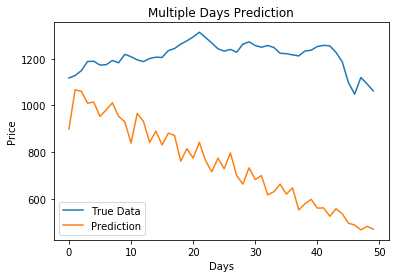

1


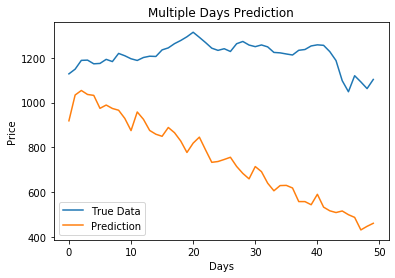

2


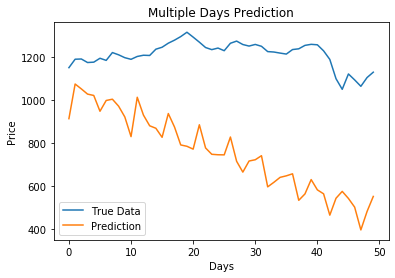

3


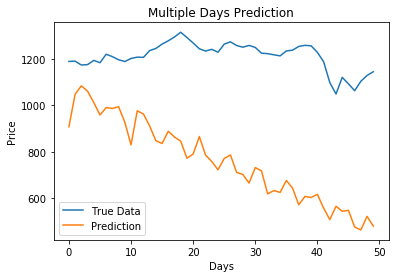

4


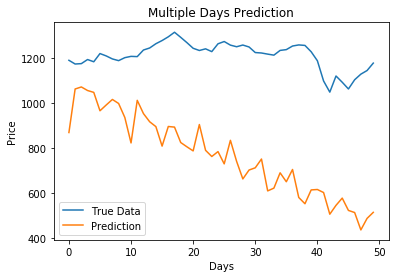

5


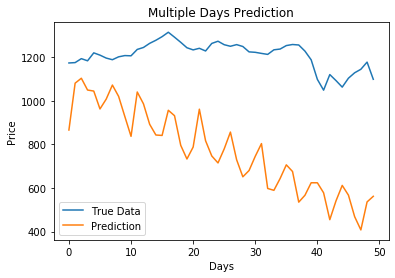

6


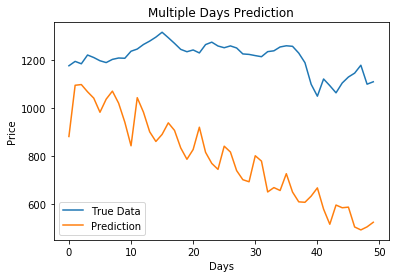

7


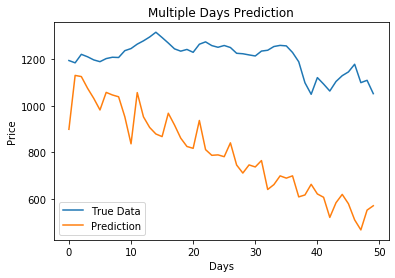

8


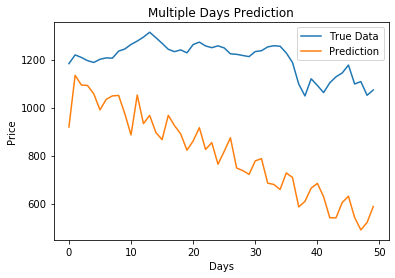

9


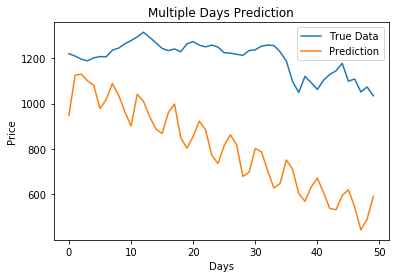

10


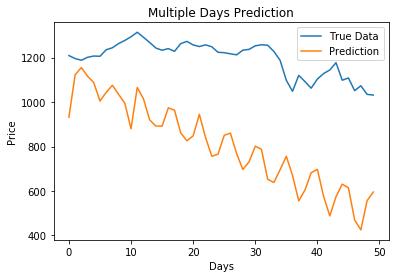

11


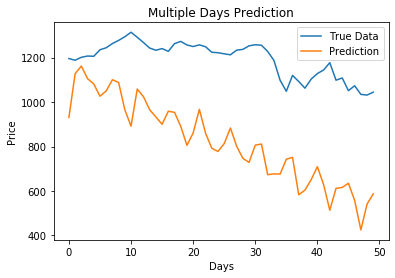

12


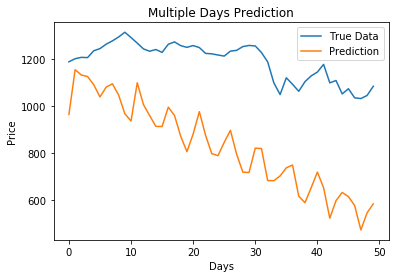

13


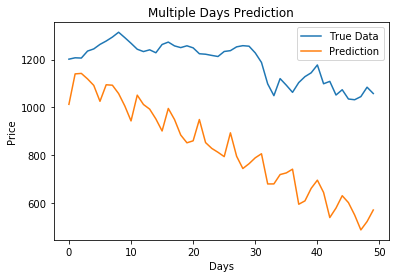

14


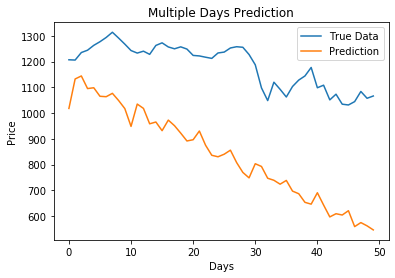

15


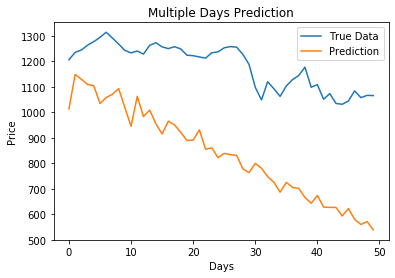

16


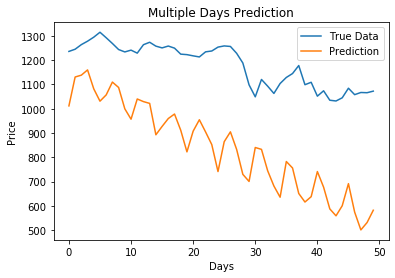

17


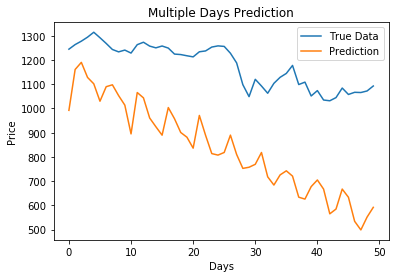

18


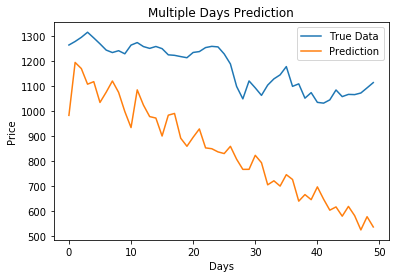

19


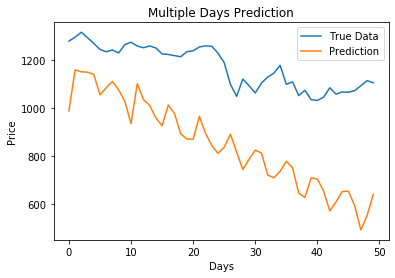

20


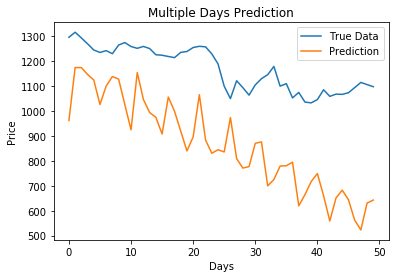

21


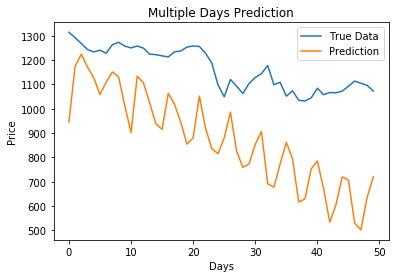

22


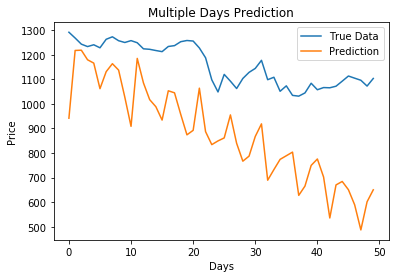

23


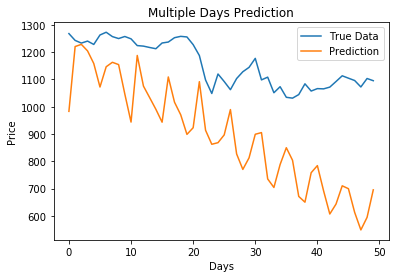

24


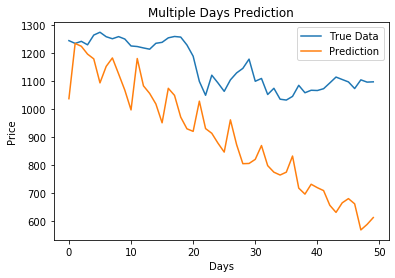

25


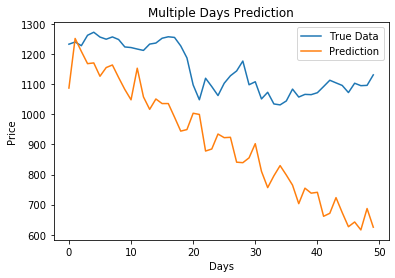

26


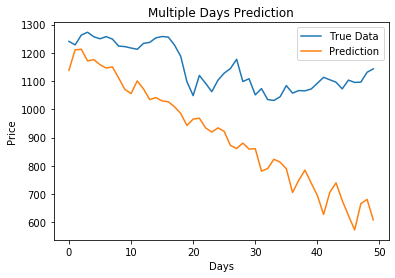

27


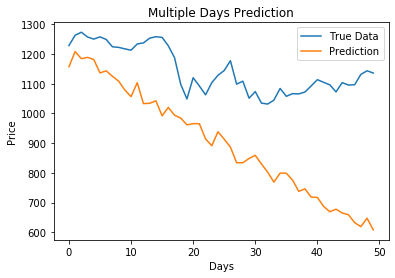

28


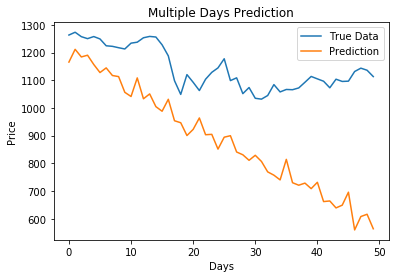

29


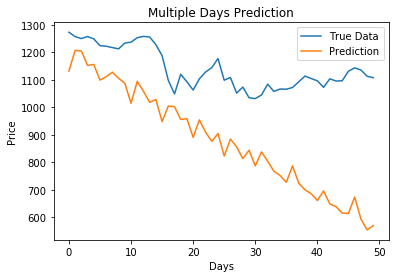

30


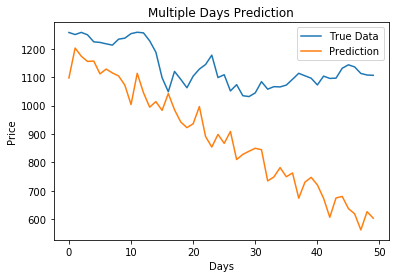

31


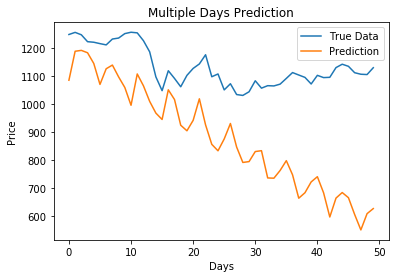

32


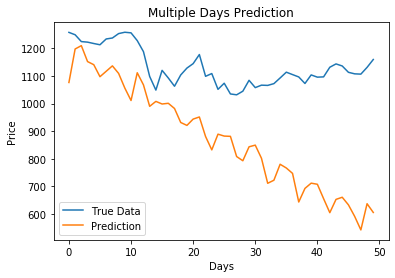

33


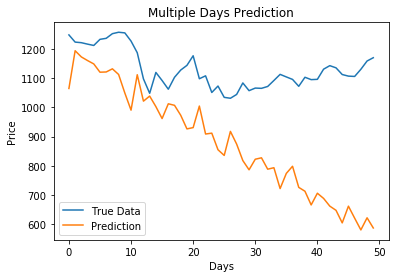

34


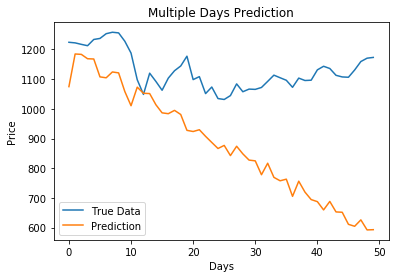

35


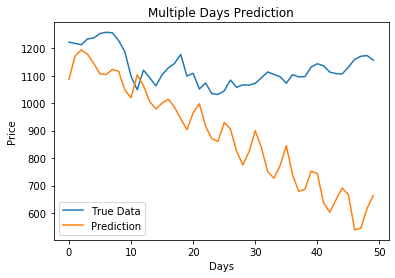

36


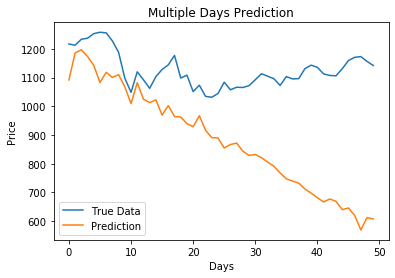

37


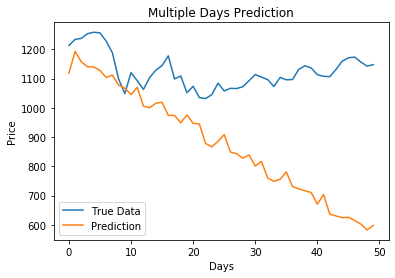

38


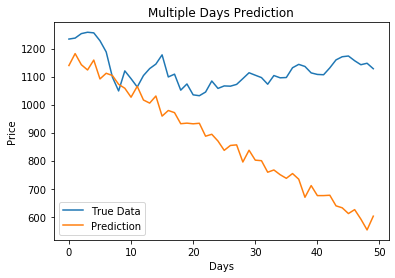

39


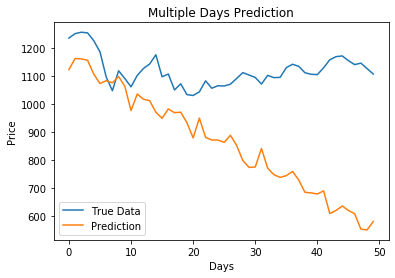

40


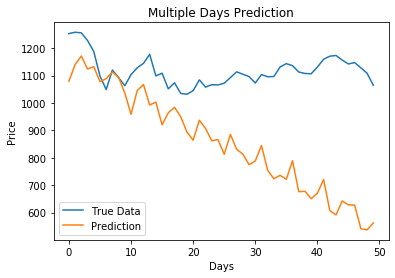

41


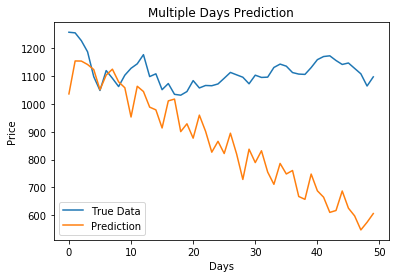

42


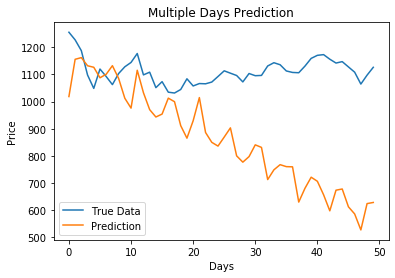

43


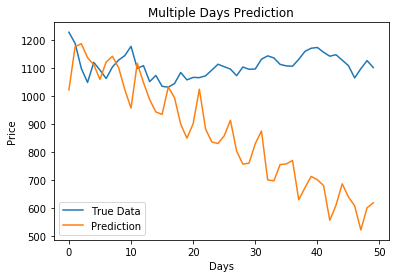

44


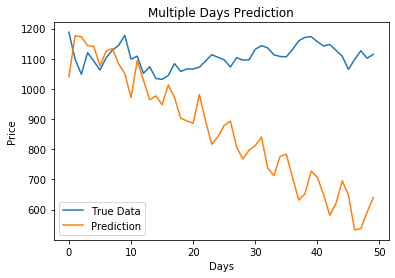

45


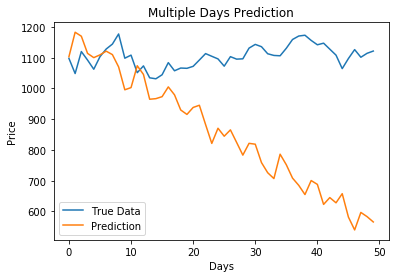

46


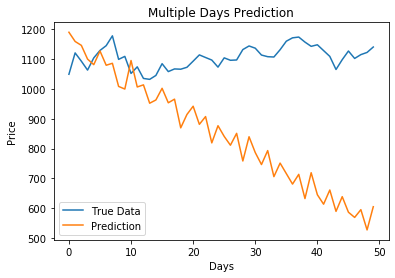

47


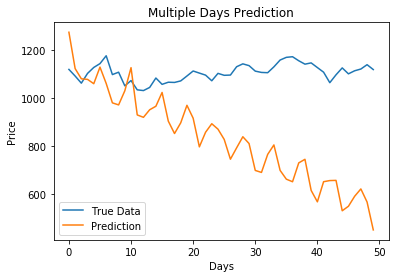

48


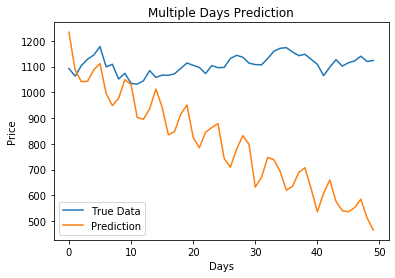

49


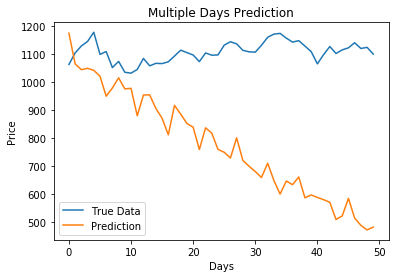

50


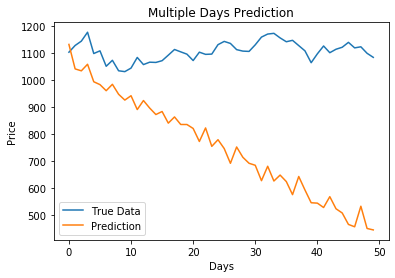

51


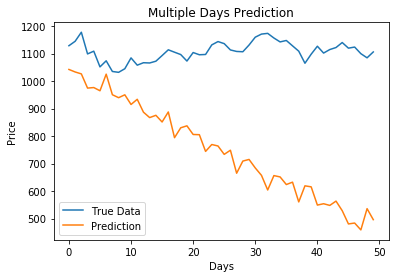

52


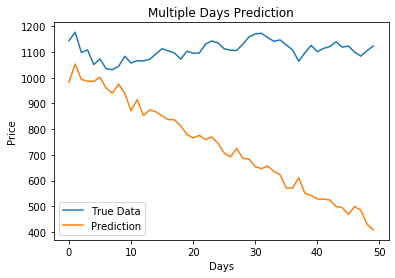

53


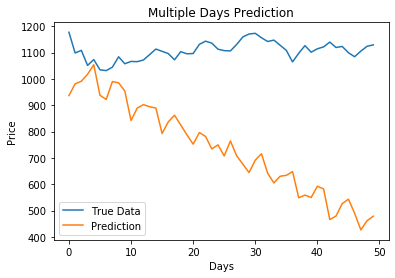

54


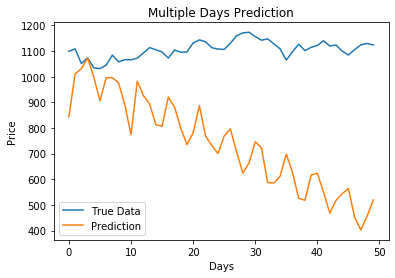

55


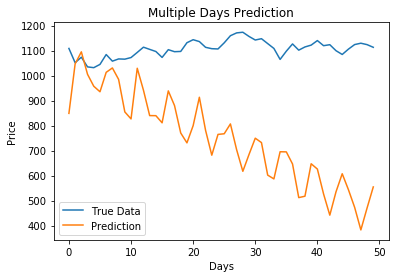

56


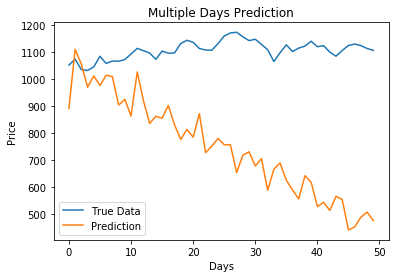

57


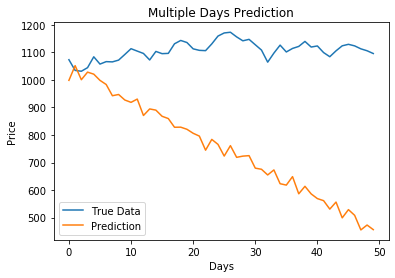

58


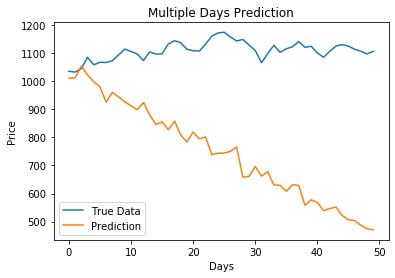

59


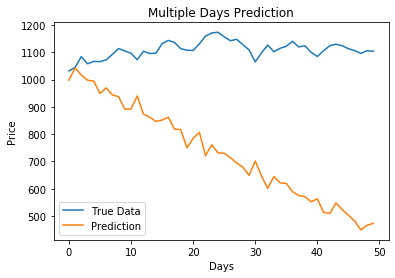

60


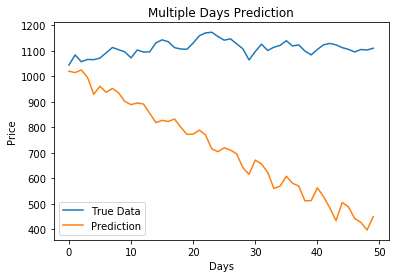

61


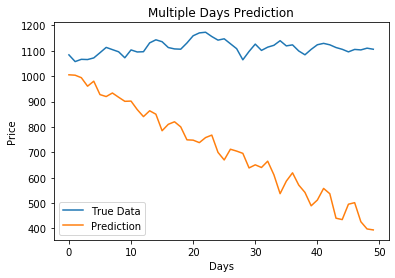

62


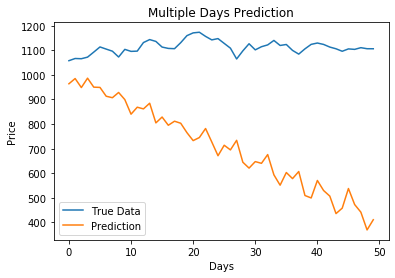

63


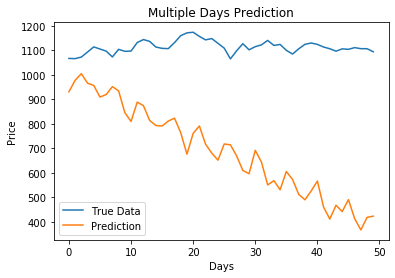

64


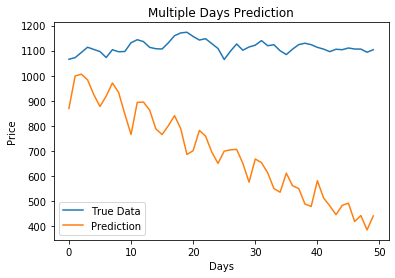

65


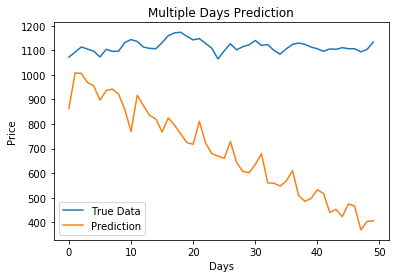

66


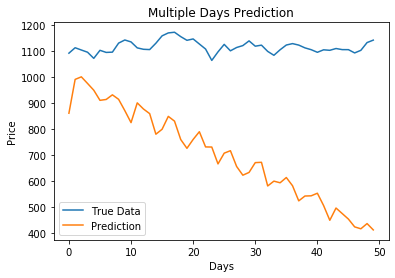

67


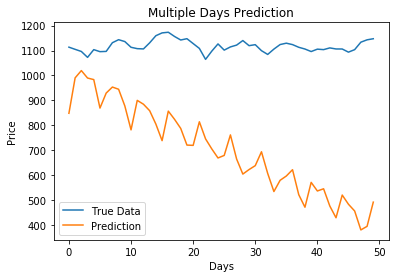

68


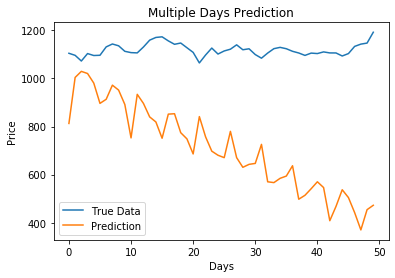

69


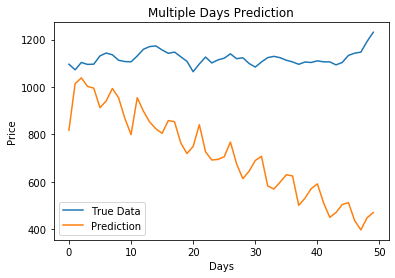

70


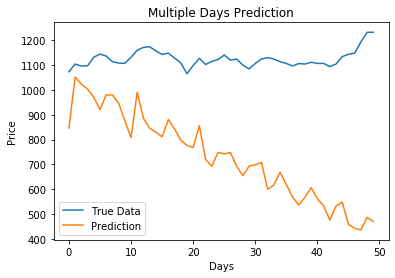

71


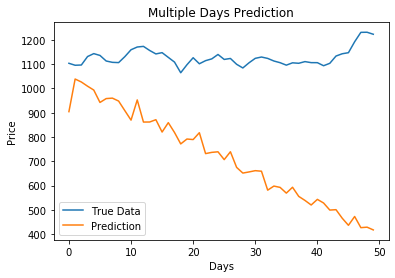

72


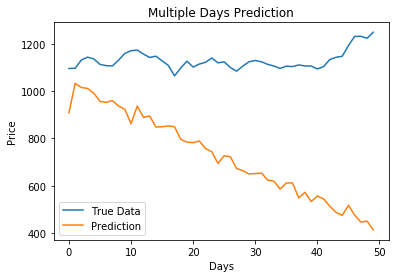

73


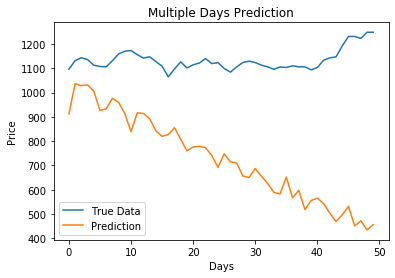

74


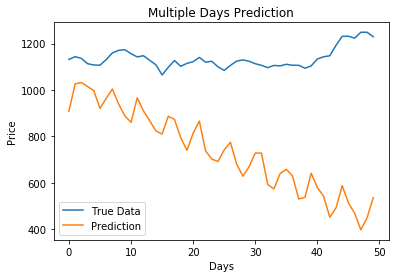

75


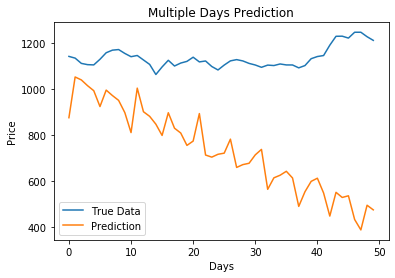

76


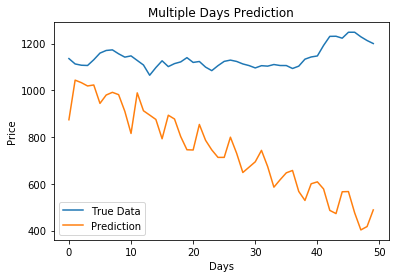

77


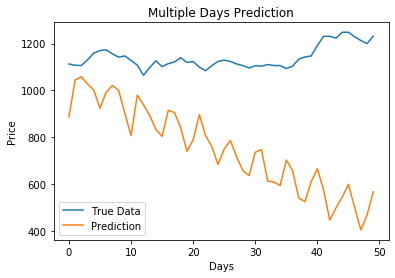

78


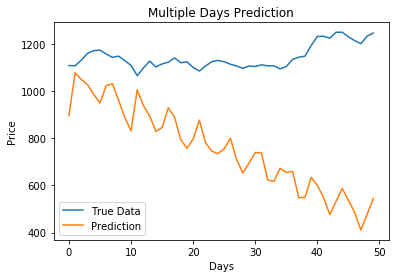

79


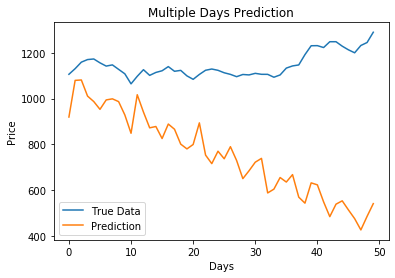

80


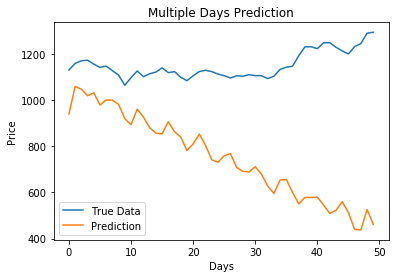

81


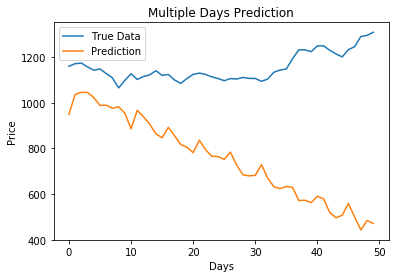

82


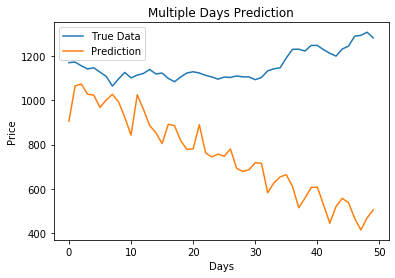

83


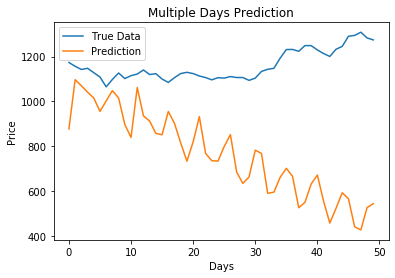

84


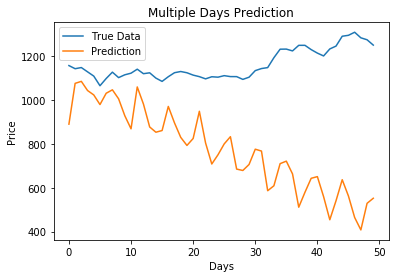

85


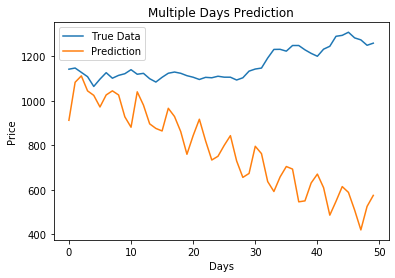

86


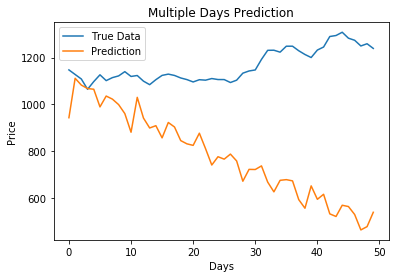

87


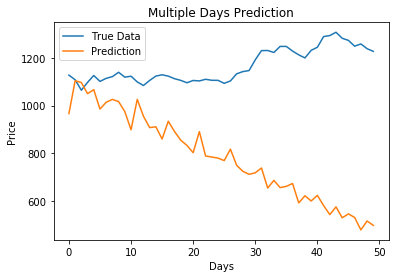

88


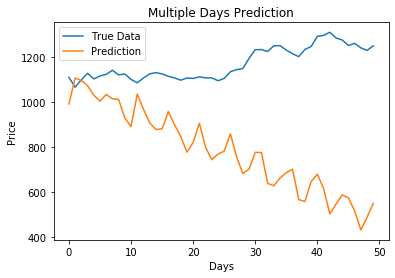

89


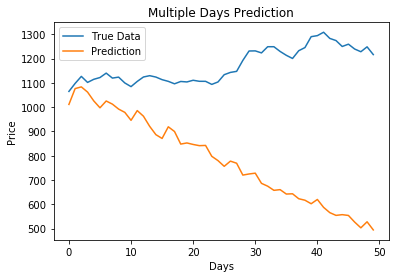

90


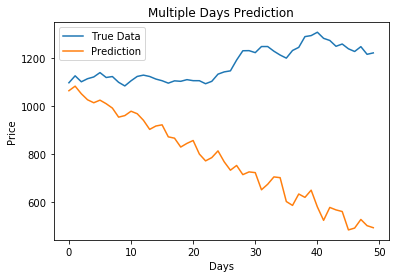

91


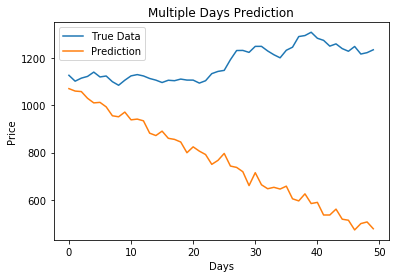

92


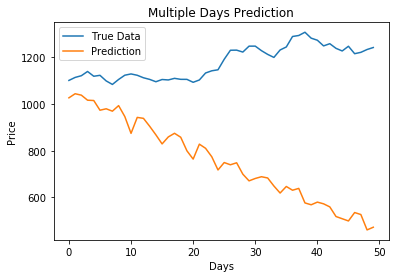

93


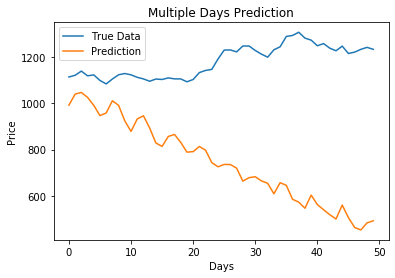

94


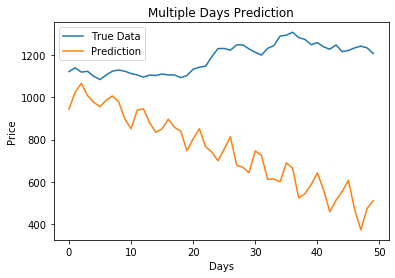

95


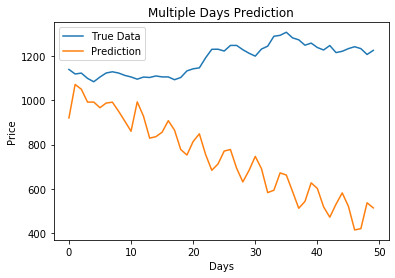

96


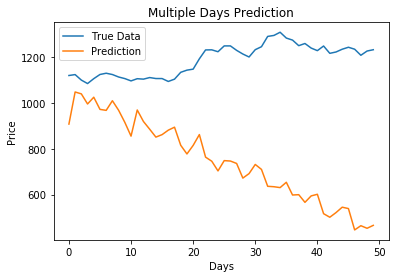

97


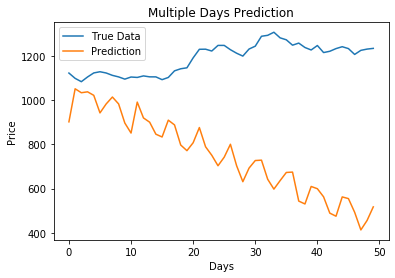

98


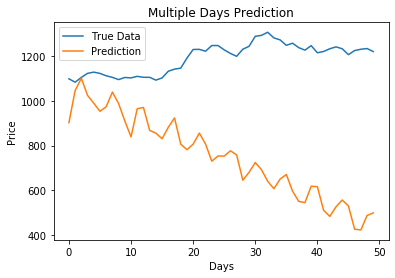

99


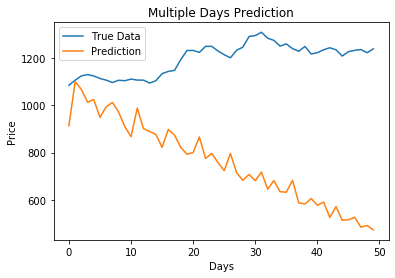

In [56]:
for d in range (100):
    prediction_seqs = np.array(prediction_seqs)
    y_predicted = np.array(y_predicted)
    size = 15
    print(d)
    plot_results(prediction_seqs[d]*std+mean ,y_predicted[d]*std+mean, "Multiple Days Prediction" )

In [41]:
def avg_loss(loss):
    loss = np.array(loss)
    return np.average(loss ,axis=0)

In [42]:
avgloss = avg_loss(loss)

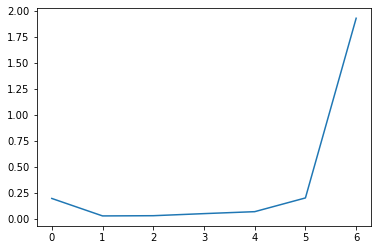

In [43]:
print_loss = []
print_loss.append(avgloss[0])
print_loss.append(avgloss[1])
print_loss.append(avgloss[2])
print_loss.append(avgloss[3])
print_loss.append(avgloss[4])
print_loss.append(avgloss[9])
print_loss.append(avgloss[49])

plt.plot(print_loss)

In [53]:
len(avgloss)

50

In [55]:
XTest.shape


(513, 10, 4)

## Performance Measures

### multiple days predictions

In [54]:
len(loss)

461

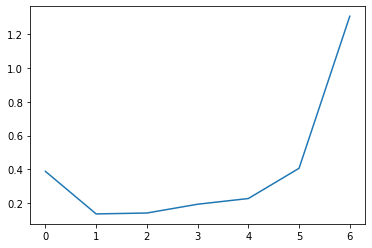

In [55]:
# Mean Absolute Error
def MeanAbsoluteError(loss):
    loss = np.array(loss)
    loss = loss**(0.5)
    loss = np.array(loss)
    avgloss =  np.average(loss ,axis=0)
    
    print_loss = []
    print_loss.append(avgloss[0])
    print_loss.append(avgloss[1])
    print_loss.append(avgloss[2])
    print_loss.append(avgloss[3])
    print_loss.append(avgloss[4])
    print_loss.append(avgloss[9])
    print_loss.append(avgloss[49])
  
    plt.plot(print_loss)
    return avgloss

mae  = MeanAbsoluteError(loss)

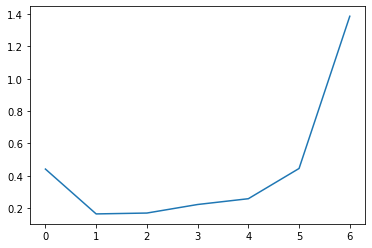

In [56]:
# Root Mean Squared Error
def rms(loss):
    loss = np.array(loss)
    print_loss = []
    avgloss = np.sqrt ( np.average(loss ,axis=0))    
    print_loss.append(avgloss[0])
    print_loss.append(avgloss[1])
    print_loss.append(avgloss[2])
    print_loss.append(avgloss[3])
    print_loss.append(avgloss[4])
    print_loss.append(avgloss[9])
    print_loss.append(avgloss[49])
  
    plt.plot(print_loss)
    return avgloss
rms = rms(loss)

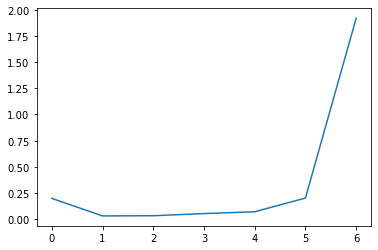

In [57]:
# Mean Squared Error
def mse(loss):
    loss = np.array(loss)
    print_loss = []
    avgloss = np.average(loss ,axis=0)   
    print_loss.append(avgloss[0])
    print_loss.append(avgloss[1])
    print_loss.append(avgloss[2])
    print_loss.append(avgloss[3])
    print_loss.append(avgloss[4])
    print_loss.append(avgloss[9])
    print_loss.append(avgloss[49])
  
    plt.plot(print_loss)
    return avgloss
mse = mse(loss)

In [58]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [59]:
# R2 score
def r2square(ytest , ypred) :
    ytest = np.array(ytest)
    ypred = np.array(ypred)
    loss =[]
    for i in range (50):
        loss.append(r2_score(ytest[:,i] , ypred[:,i]) )
    return loss
r2 = r2square(y_predicted , prediction_seqs)

In [60]:
print(r2)

[-1.5134278372331864, 0.6536170813878023, 0.6328272548318966, 0.37497696948880255, 0.17350266700785888, -0.666227744373096, -0.2418999621905069, -0.043324840760368355, -0.3792582118022243, -1.287608237401792, -2.7647255917051528, -0.4828236994237207, -1.234529706430631, -1.981483825052596, -2.547558952278632, -3.1208560233017923, -1.8621133578543239, -2.269997719500509, -3.520653719436888, -4.288770086346263, -3.892109916672805, -2.4940593310110364, -4.172823767238856, -4.970568682133976, -5.126927454013859, -4.6878312701848435, -3.839226166356551, -5.407010934347187, -6.450022240571278, -5.895710733290133, -5.025451014004682, -4.870370481656588, -6.876217848463368, -6.883951796329497, -6.2983406180847, -5.803859513607241, -6.095178290344688, -7.939218019365743, -7.681111262605, -6.671854995998493, -6.519505788131652, -7.4622627358435665, -8.901949421140111, -7.9750821113179455, -7.317116518690973, -7.576505859708783, -8.755671259745517, -9.77086514295409, -8.559108174267987, -8.101179

In [61]:
real_pred = np.array(model.get_all_prediction(XTest))
real_y = YTest*std + mean
real_pred = real_pred*std +mean

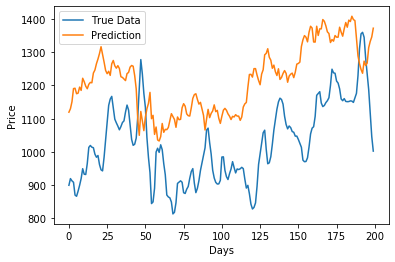

In [62]:
plot_results(real_y[:200],real_pred[:200])

In [139]:
def save_performace_measures():  
    np.save("Performance Measures/reg/r2",r2)
    np.save("Performance Measures/reg/mse",mse)
    np.save("Performance Measures/reg/rms",rms)
    np.save("Performance Measures/reg/mae",mae)
    np.save("Performance Measures/reg/pred_seqs",prediction_seqs)
    np.save("Performance Measures/reg/actual_seqs",y_predicted)
    np.save("Performance Measures/reg/real_pred",real_pred)
    np.save("Performance Measures/reg/real_y",real_y)